<font size="5">Student Performance Indicator</font>

Life cycle of Machine learning Project

* Understanding the problem statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choose best model

1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [41]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

Data checks to perform

* Check missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [10]:
#Check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
#Check duplicates
df.duplicated().sum()

0

There are no duplicated values in the data set

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring the data

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
print(f"Cateogories in 'Gender' variable: {df['gender'].unique()}")
print(f"Categories in 'race/ethnicity: {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education: {df['parental level of education'].unique()}")
print(f"Categories of lunch: {df['lunch'].unique()}")
print(f"Categories in test preparation course: {df['test preparation course'].unique()}")


Cateogories in 'Gender' variable: ['female' 'male']
Categories in 'race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [26]:
#Adding the column for total score and average
df['total score'] = df['reading score'] + df['math score'] + df['writing score']
df['average'] = df['total score'] / 3

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
#Calcualte the full marks for each subject
maths_full = (df['math score'] == 100).sum()
reading_full = (df['reading score'] == 100).sum()
writing_full = (df['writing score'] == 100).sum()

print(f"Number of student with full marks in maths: {maths_full}")
print(f"Number of student with full marks in reading: {reading_full}")
print(f"Number of student with full marks in writing: {writing_full}")

Number of student with full marks in maths: 7
Number of student with full marks in reading: 17
Number of student with full marks in writing: 14


Visualization

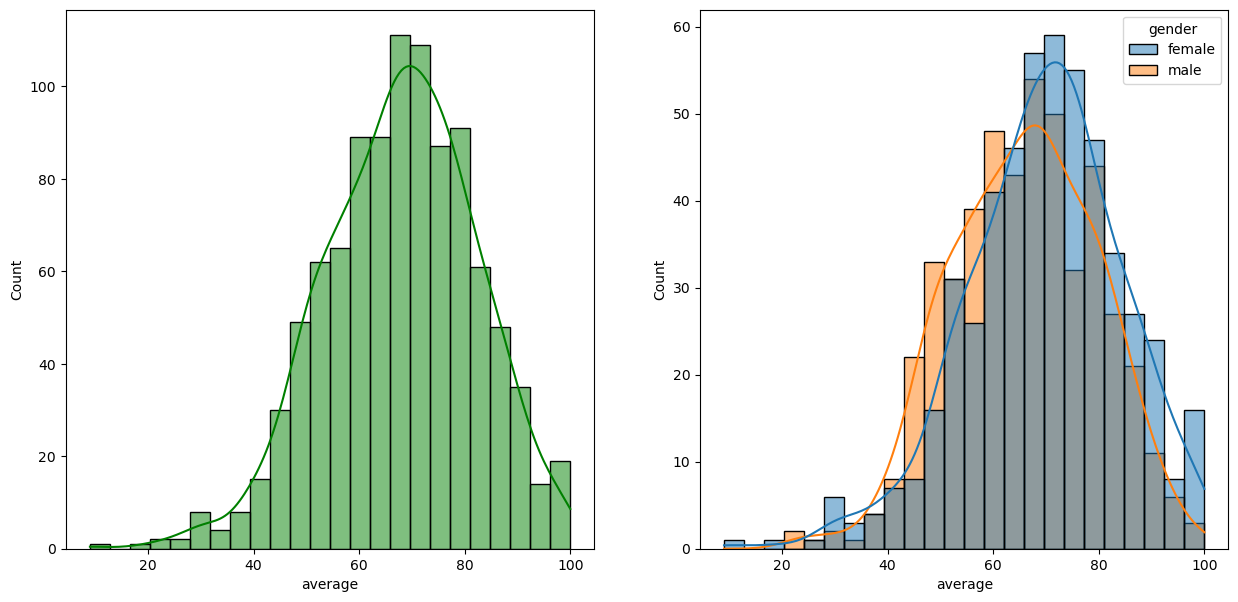

In [52]:
#Draw the averag score
fig, axs = plt.subplots(1,2,figsize=(15,7))
axs
sns.histplot(data=df, x='average', ax=axs[0], kde=True, color='green')
sns.histplot(data=df, x='average',hue='gender', kde = True, ax=axs[1])
plt.show()
